In [3]:
import matplotlib.pyplot as plt
import cv2
import fiftyone as fo
import numpy as np
import tqdm 
import matplotlib

%matplotlib widget

dataset = fo.load_dataset("RumexWeeds")

In [4]:
random_view = dataset.take(100)

r_values = np.empty((0,))
b_values = np.empty((0,)) 
g_values = np.empty((0,)) 
h_values = np.empty((0,))
s_values = np.empty((0,)) 
v_values = np.empty((0,)) 


for sample in tqdm.tqdm(random_view):
    img = cv2.imread(sample['filepath'])
    b_values = np.append(b_values, img[:, :, 0].flatten())
    g_values = np.append(g_values, img[:, :, 1].flatten())
    r_values = np.append(r_values, img[:, :, 2].flatten())
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h_values = np.append(h_values, img[:, :, 0].flatten())
    #s_values = np.append(s_values, img[:, :, 1].flatten())
    #v_values = np.append(v_values, img[:, :, 2].flatten())


100%|██████████| 100/100 [04:26<00:00,  2.66s/it]


In [ ]:
fig, ax = plt.subplots(1,1)
_ = ax.hist(b_values, bins=256, color=(0,0,1.0, 0.5))
_ = ax.hist(g_values, bins=256, color=(0,1.0,0, 0.5))
_ = ax.hist(r_values, bins=256, color=(1.0,0,0, 0.5))

/home/pat/anaconda3/envs/yolov5/lib/python3.9/site-packages/numpy/lib/npyio.py:518: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


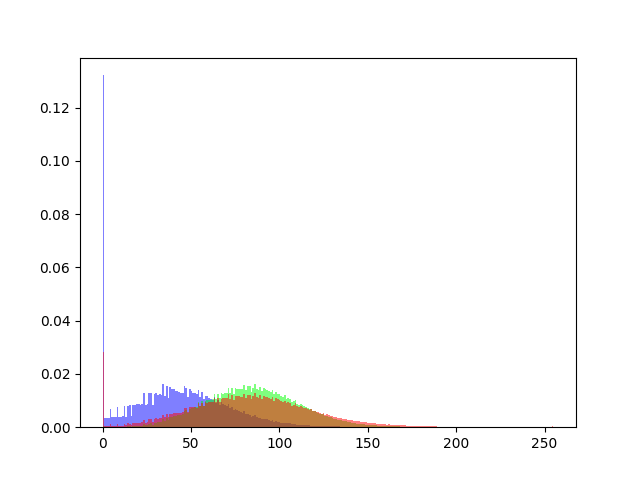

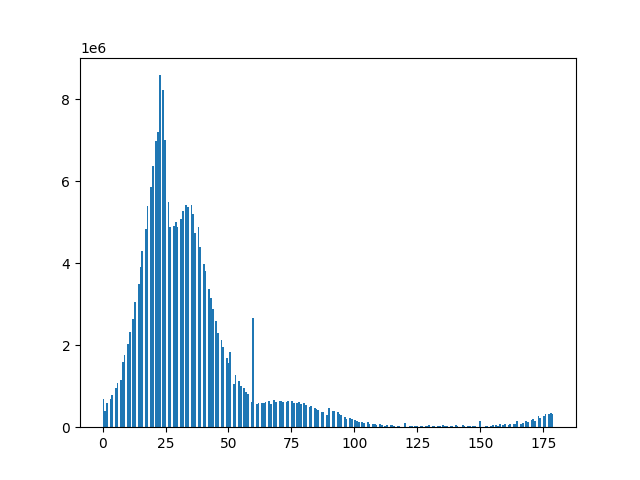

In [5]:
fig, ax = plt.subplots(1,1)
hist_b = ax.hist(b_values, bins=256, color=(0,0,1.0, 0.5), density=True)
hist_g = ax.hist(g_values, bins=256, color=(0,1.0,0,0.5), density=True)
hist_r = ax.hist(r_values, bins=256, color=(1.0, 0, 0, 0.5), density=True)
fig, ax = plt.subplots(1,1)
hist_h = ax.hist(h_values, bins=256)

np.save('hist_bgr_h_rumex', [hist_b, hist_g, hist_r, hist_h])

In [8]:
coco_hist_b, coco_hist_g, coco_hist_r = np.load('/home/pat/galirumi-dtu-transfer/RumexWeeds-github/tools/notebooks/bgr_hist_coco.npy', allow_pickle=True)
coco_h_hist = np.load('/home/pat/galirumi-dtu-transfer/RumexWeeds-github/tools/notebooks/h_hist_coco.npy', allow_pickle=True)


(0.0, 0.01702703790849673)

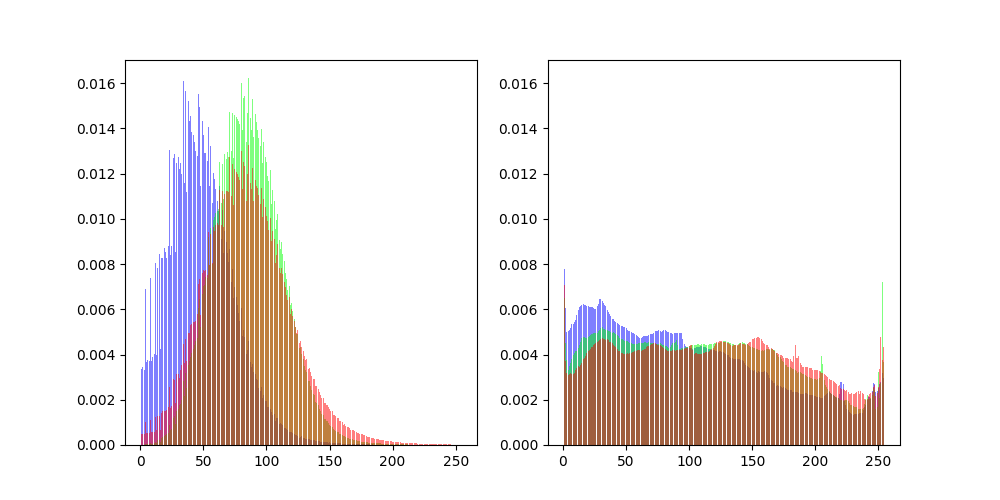

In [7]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
ax1.bar(np.arange(1,255), hist_b[0][1:-1], color=(0.0, 0.0, 1.0, 0.5))
ax1.bar(np.arange(1,255), hist_g[0][1:-1], color=(0.0, 1.0, 0.0, 0.5))
ax1.bar(np.arange(1,255), hist_r[0][1:-1], color=(1.0, 0.0, 0.0, 0.5))
ax2.bar(np.arange(1,255), coco_hist_b[0][1:-1], color=(0.0, 0.0, 1.0, 0.5))
ax2.bar(np.arange(1,255), coco_hist_g[0][1:-1], color=(0.0, 1.0, 0.0, 0.5))
ax2.bar(np.arange(1,255), coco_hist_r[0][1:-1], color=(1.0, 0.0, 0.0, 0.5))
ax2.set_ylim(ax1.get_ylim())



(180, 3)


Text(0, 0.5, 'Density')

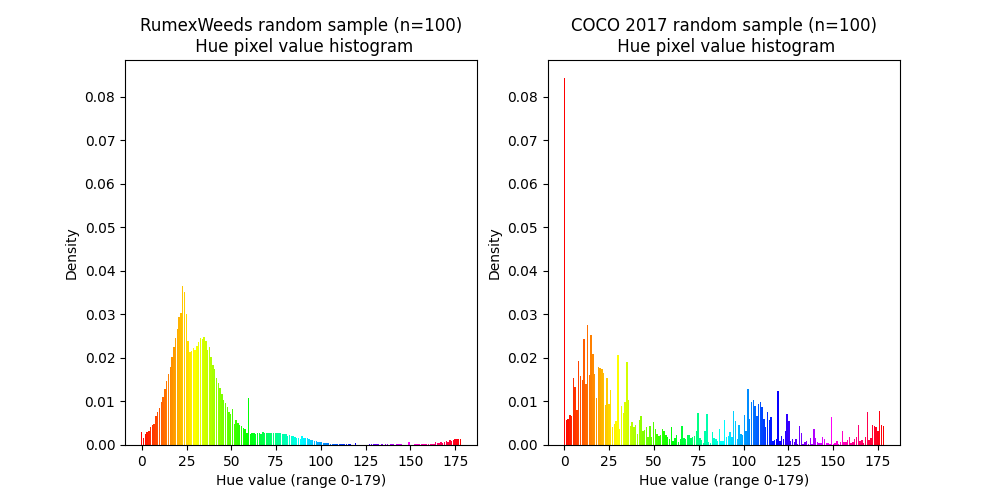

In [14]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
hist = np.histogram(h_values, bins=180, density=True)
hist_hsv = np.concatenate((np.arange(0, 1+1/179, 1/179).reshape(-1,1), np.ones((180,1)), np.ones((180,1))), axis=1)
print(hist_hsv.shape)
ax1.bar(hist[1][0:-1], hist[0], color=matplotlib.colors.hsv_to_rgb(hist_hsv))
ax2.bar(coco_h_hist[1][0:-1], coco_h_hist[0], color=matplotlib.colors.hsv_to_rgb(hist_hsv))
min1,max1 = ax1.get_ylim()
min2, max2 = ax2.get_ylim()
if max2 > max1:
    ax1.set_ylim(ax2.get_ylim())
else:
    ax2.set_ylim(ax1.get_ylim())
ax1.set_title("RumexWeeds random sample (n=100)\n Hue pixel value histogram")
ax2.set_title("COCO 2017 random sample (n=100)\n Hue pixel value histogram")
ax1.set_xlabel('Hue value (range 0-179)')
ax1.set_ylabel('Density')
ax2.set_xlabel('Hue value (range 0-179)')
ax2.set_ylabel('Density')
